In [1]:
#Nav_IMS0000_24th_feb.Asc
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
my_example_nc_file = 'EUREC4A_HALO_BAHAMAS-Radiometer_20200128a.nc'
fh = Dataset(my_example_nc_file, mode='r')
df_fdir = pd.read_csv('BBR_DirectFraction_Flight_20200128a_R0.dat',skiprows = 34,delim_whitespace=True)
df_fdw = pd.read_csv('BBR_Fdn_clear_sky_Flight_20200128a_R0.dat',skiprows = 34, delim_whitespace=True)
nav = pd.read_csv('Nav_IMS0000_24th_jan.Asc',skiprows=14, header=None,delim_whitespace=True)
navi = nav.iloc[:,1:5]
navi.columns=['time','roll','pitch','yaw']
fdw_time = df_fdw.loc[:,['sod','F_dw']]
fdir_time = df_fdir.loc[:,'f_dir']
db = pd.concat([fdw_time,fdir_time],axis=1)
db.set_index('sod',inplace=True)
time = fh.variables['TIME'][:] # time
time_bac = pd.DataFrame(time.T, columns = ['time'])
time_bac = time_bac/1000
db,time_bac

(             F_dw     f_dir
 sod                        
 52009  777.509522  0.850760
 52129  781.799988  0.851374
 52249  785.827393  0.851802
 52369  790.070251  0.852477
 52489  794.049194  0.852970
 ...           ...       ...
 76755  143.628021  0.892181
 76875  133.450363  0.886758
 76995  122.412567  0.880180
 77115  110.577972  0.872055
 77235   98.015861  0.862011
 
 [211 rows x 2 columns],            time
 0       53914.0
 1       53914.1
 2       53914.2
 3       53914.3
 4       53914.4
 ...         ...
 322035  86117.5
 322036  86117.6
 322037  86117.7
 322038  86117.8
 322039  86117.9
 
 [322040 rows x 1 columns])

In [4]:
array = np.arange(52009,86118, 1)
arr = array.repeat(10)
df_arr = pd.DataFrame(arr, columns = ['time_arr'])
df_arr.set_index('time_arr',inplace=True)
data = df_arr.join(db)
data_int= data.interpolate(method='linear', limit_direction='forward', axis=0)
data_int.reset_index(inplace=True)
data_int.drop(data_int.index[0:19050],inplace=True)
data_int.columns=['time','F_dw','f_dir']
data_int.reset_index(inplace=True,drop=True)
data_int
#data_int['time']=data_int.loc[:,'index']
#data_int[data_int['time']==53914]
#df_r = data_int.iloc[0:16420,:]
#df_r

,time,F_dw,f_dir
0,53914,843.102362,0.864257
1,53914,843.112780,0.864263
2,53914,843.123198,0.864270
3,53914,843.133617,0.864277
4,53914,843.144035,0.864284
...,...,...,...
322035,86117,98.015861,0.862011
322036,86117,98.015861,0.862011
322037,86117,98.015861,0.862011
322038,86117,98.015861,0.862011


In [5]:
fdw = data_int.loc[:,'F_dw']
fdir = data_int.loc[:,'f_dir']
szai = fh.variables['SUN_ALT'][:] # solar altitude angle
sza = pd.DataFrame(szai.T)
sza.columns=['SUN_ALT']
saai = fh.variables['SUN_AZI'][:] # solar azimuth angle
saa = pd.DataFrame(saai.T)
saa.columns=['SUN_AZI']
SWd = fh.variables['FDSC'][:]
SWD = pd.DataFrame(SWd.T)
SWD.columns=['shortwave_down']
SWu = fh.variables['FUS'][:]
LWu = fh.variables['FDL'][:]
LWd = fh.variables['FUL'][:]
SWU = pd.DataFrame(SWu.T)
SWU.columns=['ShortWave_up']
LWU = pd.DataFrame(LWu.T)
LWU.columns=['LongWave_down']
LWD = pd.DataFrame(LWd.T)
LWD.columns=['LongWave_up']
radiometer_nc= pd.concat([time_bac,SWD,SWU,LWU,LWD,saa,sza,fdw,fdir],axis=1)
d = radiometer_nc.loc[:,'time'].astype(str).str.split('.')
dec = []
for b,n in d:
    dec.append(b)
decend = pd.DataFrame(dec)
decend.columns=['Time']
df2=pd.concat([decend,radiometer_nc],axis=1)
df2.drop(['time'],axis=1,inplace=True)
df2

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir
0,53914,891.265259,36.021637,387.893951,573.260376,148.839401,53.892799,843.102362,0.864257
1,53914,890.692078,36.377426,386.465027,573.032471,148.840073,53.893032,843.112780,0.864263
2,53914,888.923828,36.318420,387.815582,573.299255,148.840759,53.893265,843.123198,0.864270
3,53914,888.524109,36.480495,385.538177,572.458862,148.841446,53.893494,843.133617,0.864277
4,53914,887.538086,36.038483,384.677155,571.878296,148.842117,53.893726,843.144035,0.864284
...,...,...,...,...,...,...,...,...,...
322035,86117,-0.906200,-2.878024,392.024475,481.956329,-103.496201,-27.902328,98.015861,0.862011
322036,86117,-1.113852,-2.991964,388.792023,482.389313,-103.496140,-27.902775,98.015861,0.862011
322037,86117,-0.911150,-2.961419,384.575714,482.662201,-103.496086,-27.903223,98.015861,0.862011
322038,86117,-2.392870,-3.263771,383.841766,483.014191,-103.496025,-27.903671,98.015861,0.862011


In [6]:
ri = fh.variables['IRS_PHI'][:] # roll angle "deg"
ro = pd.DataFrame(ri.T,columns=['roll'])
pi = fh.variables['IRS_THE'][:] # pitch angle "deg"
po = pd.DataFrame(pi.T,columns=['pitch'])
yi = fh.variables['IRS_HDG'][:] # yaw angle "deg"
y = pd.DataFrame(yi.T,columns=['yaw'])
df_big = pd.concat([df2,ro,po,y],axis=1)
df_big

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir,roll,pitch,yaw
0,53914,891.265259,36.021637,387.893951,573.260376,148.839401,53.892799,843.102362,0.864257,0.336358,4.415406,76.150238
1,53914,890.692078,36.377426,386.465027,573.032471,148.840073,53.893032,843.112780,0.864263,0.308016,4.880654,76.157661
2,53914,888.923828,36.318420,387.815582,573.299255,148.840759,53.893265,843.123198,0.864270,0.301444,5.363746,76.167793
3,53914,888.524109,36.480495,385.538177,572.458862,148.841446,53.893494,843.133617,0.864277,0.320953,5.774442,76.191071
4,53914,887.538086,36.038483,384.677155,571.878296,148.842117,53.893726,843.144035,0.864284,0.313601,6.172773,76.201927
...,...,...,...,...,...,...,...,...,...,...,...,...
322035,86117,-0.906200,-2.878024,392.024475,481.956329,-103.496201,-27.902328,98.015861,0.862011,0.377426,1.038626,77.105820
322036,86117,-1.113852,-2.991964,388.792023,482.389313,-103.496140,-27.902775,98.015861,0.862011,0.481341,0.826932,77.058304
322037,86117,-0.911150,-2.961419,384.575714,482.662201,-103.496086,-27.903223,98.015861,0.862011,0.611401,0.555865,77.011200
322038,86117,-2.392870,-3.263771,383.841766,483.014191,-103.496025,-27.903671,98.015861,0.862011,0.720958,0.259015,76.958359


In [7]:
import math
r_off =  0.3
p_off =  -2.33
i1=[]
i2=[]
j1=[]
j2=[]
k1=[]
k2=[]
l1=[]
l2=[]

for i in df_big.SUN_ALT:
    i1.append(math.sin((90-i)*(math.pi/180)))
    i2.append(math.cos((90-i)*(math.pi/180)))
for k in df_big.roll:
    k=k+r_off
    k1.append(math.sin(k*(math.pi/180)))
    k2.append(math.cos(k*(math.pi/180)))
diff = df_big.SUN_AZI-df_big.yaw
for j in diff:
    j1.append(math.sin(j*(math.pi/180)))
    j2.append(math.cos(j*(math.pi/180)))
for l in df_big.pitch:
    l=l+p_off
    l1.append(math.sin(l*(math.pi/180)))
    l2.append(math.cos(l*(math.pi/180)))
       
eq1 = i1
eq2 = [i2[i]*k1[i]*j1[i] for i in range(len(i2))]
eq3 = [i2[i]*l1[i] for i in range(len(i2))]
eq4 = [k2[i]*j2[i] for i in range(len(k2))]
eq5 = [i1[i]*l2[i]*k2[i] for i in range(len(i1))]
factor = [eq1[i]/(eq2[i]+(eq3[i]*eq4[i])+eq5[i]) for i in range(len(eq1))]
x = df_big.F_dw
y = df_big.f_dir
Fdw = [y[i]*x[i]*factor[i]+(1-y[i])*x[i] for i in range(len(i1))]

swd_correct = pd.DataFrame(Fdw)
swd_correct.columns = ['shortwave_down_corrected']
df_big['shortwave_down_corrected']=swd_correct
df_bigg = df_big.groupby('Time').mean()
df_bigg.reset_index(inplace=True)
#df_bigg.to_csv('df_bigg_31jan.csv')

In [10]:
def convertSeconds(seconds):
    h = seconds//(60*60)
    m = (seconds-h*60*60)//60
    s = seconds-(h*60*60)-(m*60)
    return [h, m, s]
convertSeconds(86117)

[23, 55, 17]

In [11]:
import datetime
start = datetime.datetime(2020, 1, 28, 14, 58, 34)
end = datetime.datetime(2020, 1, 28, 23, 55, 17)
delta = end - start
time_delta = []
for i in range(delta.seconds + 1):
    time_delta.append(start + datetime.timedelta(seconds=i))
df_time_delta = pd.DataFrame(time_delta)
df_bigg['time']=df_time_delta
df_bigg.to_csv('df_bigg_28jan.csv')

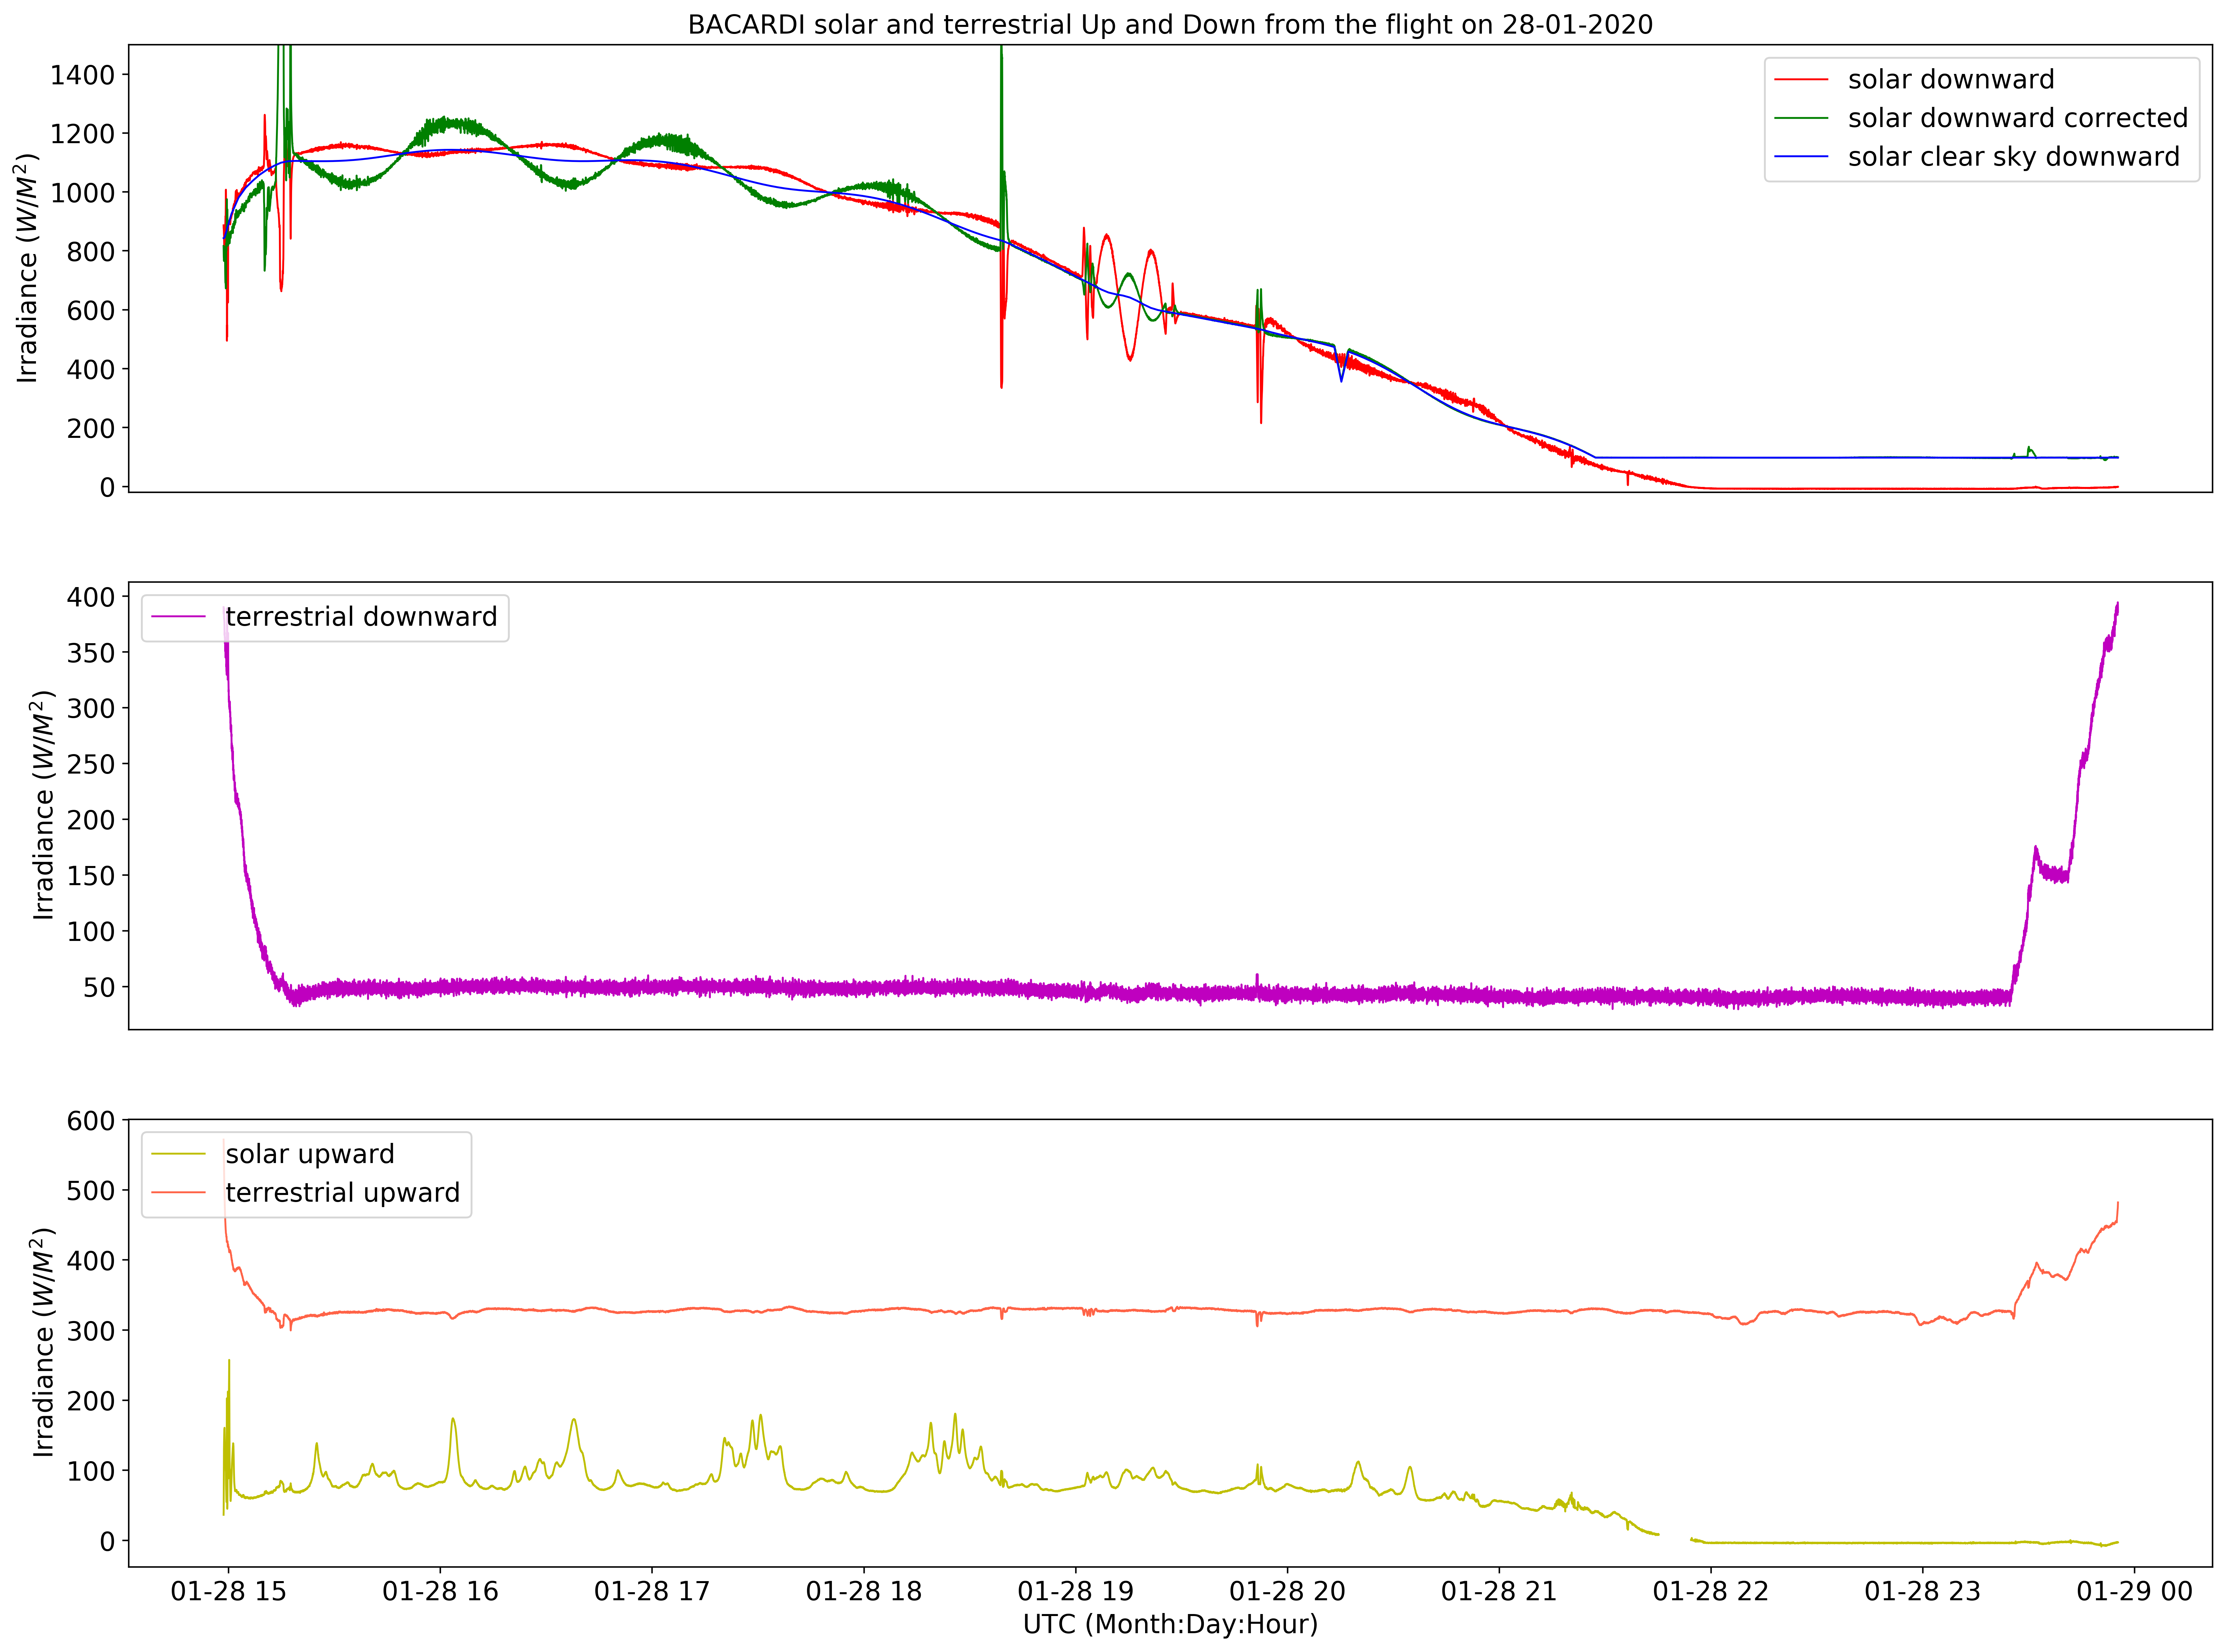

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
#df_new_24jan = pd.read_csv('df_new_24jan.csv')
plt.figure(figsize=(20,15),dpi=400)
plt.subplot(311)
plt.plot(df_bigg.time,df_bigg.shortwave_down, 'r', label = 'solar downward',linewidth=1)
plt.plot(df_bigg.time,df_bigg.shortwave_down_corrected, 'g', label = 'solar downward corrected',linewidth=1)
plt.plot(df_bigg.time,df_bigg.F_dw, 'b', label = 'solar clear sky downward',linewidth=1)
plt.ylim(-20,1500)
plt.title('BACARDI solar and terrestrial Up and Down from the flight on 28-01-2020',fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper right')
plt.subplot(312)
plt.plot(df_bigg.time,df_bigg.LongWave_down, 'm', label = 'terrestrial downward',linewidth=1)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.subplot(313)
plt.plot(df_bigg.time,df_bigg.ShortWave_up, 'y', label = 'solar upward',linewidth=1)
plt.plot(df_bigg.time,df_bigg.LongWave_up, 'tomato', label = 'terrestrial upward',linewidth=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xlabel('UTC (Month:Day:Hour)',fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.show()